<a href="https://colab.research.google.com/github/RahulV-31/Python/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#List Operations

In [2]:
#Creating a list of student IDs for 20 initial students
student_ids = [f"ID{i}" for i in range(1, 21)]

# List of names for the students
names = [
    "Aarav", "Vivaan", "Aditya", "Ananya", "Diya", "Ishaan", "Kavya", "Meera", "Rohan", "Sneha",
    "Aryan", "Priya", "Nisha", "Ria", "Yash", "Siddharth", "Harsh", "Tara", "Krishna", "Neha"
]

# Assigning random subjects (Math, Science, English) to the students
subjects = random.choices(["Math", "Science", "English"], k=20)

# Generate attendance (random between 60 and 100 for each student)
attendance = [random.randint(60, 100) for _ in range(20)]

# Generate marks based on attendance (higher attendance = higher marks)
marks = [round((att * random.uniform(0.8, 1.2)), 1) for att in attendance]



#Adding More Students

In [3]:
# Adding 20 more students with realistic names and random data
new_names = [
    "Vikram", "Sanjay", "Kiran", "Radha", "Lakshmi", "Asha", "Bhavana", "Sagar", "Nitin",
    "Leena", "Manish", "Pooja", "Rahul", "Vineet", "Sonali", "Arjun", "Smita", "Deepak",
    "Seema", "Aditi"
]
for i in range(len(new_names)):
    student_ids.append(f"ID{len(student_ids) + 1}")
    names.append(new_names[i])  # Use realistic names
    subjects.append(random.choice(["Math", "Science", "English"]))
    new_attendance = random.randint(60, 100)
    attendance.append(new_attendance)
    marks.append(round((new_attendance * random.uniform(0.8, 1.2)), 1))


#Student Data Dictionary

In [4]:
#Creating the main data structure (dictionary) to hold student data
students_data = {
    "Student_ID": student_ids,
    "Name": names,
    "Subject": subjects,
    "Attendance": attendance,
    "Marks": marks
}


#Adding Additional Students

In [5]:
# Adding 40 more students with realistic names
additional_names = [
    "Ramesh", "Anjali", "Gopal", "Meghna", "Ravi", "Swati", "Rajesh", "Sonia", "Dinesh", "Kajal",
    "Vivaan", "Rohan", "Aditya", "Diya", "Sneha", "Neha", "Priya", "Ria", "Yash", "Tara",
    "Krish", "Nitin", "Priyanka", "Rohan", "Yashwant", "Tejas", "Krushna", "Nehal", "Priyanshu",
    "Ray", "Yogesg", "Tanish", "Deepesh", "Naman", "Prakash", "Rao", "Yashwanta", "Tilak", "Kartik",
    "Ashish", "Pratik", "Ram", "Darshan", "Divya", "Gopesh"
]

# Adding more students data
for i in range(len(additional_names)):
    students_data["Student_ID"].append(f"ID{len(students_data['Student_ID']) + 1}")
    students_data["Name"].append(additional_names[i])  # Use a name from the list
    students_data["Subject"].append(random.choice(["Math", "Science", "English"]))
    new_attendance = random.randint(60, 100)
    students_data["Attendance"].append(new_attendance)
    new_marks = round(new_attendance * random.uniform(0.85, 1.15), 1)
    students_data["Marks"].append(new_marks)

# Null Value Introduction

In [6]:
for _ in range(5):
    students_data["Marks"][random.randint(0, len(students_data["Marks"]) - 1)] = None


#Expanding Data with NumPy


In [7]:
# Existing data
marks_array = np.array([m if m is not None else 0 for m in students_data["Marks"]])
attendance_array = np.array(students_data["Attendance"])

# Extending Data

# Creating new data for 20 students to extend the data
new_ids = np.array([f"student{i}" for i in range(1, 21)])
new_names = np.array([f"Student{i}" for i in range(1, 21)])
new_subjects = np.array([random.choice(["Math", "Science", "English"]) for _ in range(20)])
new_attendance = np.array([random.randint(60, 100) for _ in range(20)])
new_marks = np.array([round(att * random.uniform(0.85, 1.15), 1) for att in new_attendance])

# Extending existing data with new arrays
marks_array = np.concatenate((marks_array, new_marks))
attendance_array = np.concatenate((attendance_array, new_attendance))

# Updating the 'students_data' dictionary with the new data
students_data["Student_ID"] = np.append(students_data["Student_ID"], new_ids)
students_data["Name"] = np.append(students_data["Name"], new_names)
students_data["Subject"] = np.append(students_data["Subject"], new_subjects)
students_data["Attendance"] = np.append(students_data["Attendance"], new_attendance)
students_data["Marks"] = np.append(students_data["Marks"], new_marks)


#Creating DataFrame with Pandas

In [8]:
# Convert the dictionary to a DataFrame for easier analysis
students_df = pd.DataFrame(students_data)

#Basic EDA

In [9]:
# Basic Exploratory Data Analysis (EDA) on the DataFrame
print("\n--- Basic EDA ---")
print(students_df.info())
print(students_df.describe())
print("Number of null values in each column:")
print(students_df.isnull().sum())


--- Basic EDA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_ID  105 non-null    object
 1   Name        105 non-null    object
 2   Subject     105 non-null    object
 3   Attendance  105 non-null    int64 
 4   Marks       100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB
None
       Attendance
count  105.000000
mean    80.285714
std     11.789593
min     60.000000
25%     70.000000
50%     79.000000
75%     91.000000
max    100.000000
Number of null values in each column:
Student_ID    0
Name          0
Subject       0
Attendance    0
Marks         5
dtype: int64


# Handling Null Values

In [10]:
# Removing rows with null values in 'Marks' column
students_df = students_df.dropna(subset=["Marks"])
students_df.isnull().sum()

,0
Student_ID,0
Name,0
Subject,0
Attendance,0
Marks,0


# Data Visualization

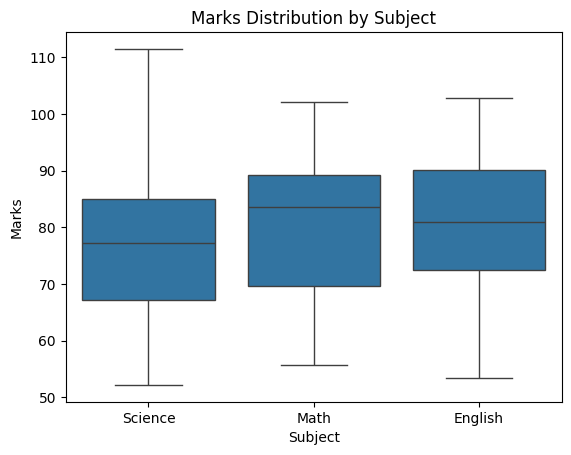

In [11]:
# Boxplot to visualize marks distribution by subject
sns.boxplot(x="Subject", y="Marks", data=students_df)
plt.title("Marks Distribution by Subject")
plt.show()

In [12]:
# Detecting and printing outliers
outliers = students_df[(students_df["Marks"] > 100) | (students_df["Marks"] < 0)]
print(outliers)

# Removing outliers from the dataset
students_df = students_df[~((students_df["Marks"] > 100) | (students_df["Marks"] < 0))]

# Print the updated DataFrame without outliers
print(students_df)

   Student_ID       Name  Subject  Attendance  Marks
15       ID16  Siddharth  Science          96  111.5
22       ID23      Kiran  English          84  100.3
27       ID28      Sagar  Science          93  109.7
44       ID45       Ravi     Math          93  102.1
51       ID52      Rohan     Math          94  100.5
56       ID57      Priya  Science          98  110.7
63       ID64      Rohan  English          91  102.9
    Student_ID       Name  Subject  Attendance Marks
1          ID2     Vivaan  Science          91  81.7
2          ID3     Aditya     Math          68  71.7
3          ID4     Ananya     Math          61  72.2
4          ID5       Diya  Science          69  66.6
5          ID6     Ishaan     Math          96  91.7
..         ...        ...      ...         ...   ...
100  student16  Student16     Math          83  86.7
101  student17  Student17  Science          77  82.1
102  student18  Student18     Math          75  77.0
103  student19  Student19  English          79

Visualizing Distribution

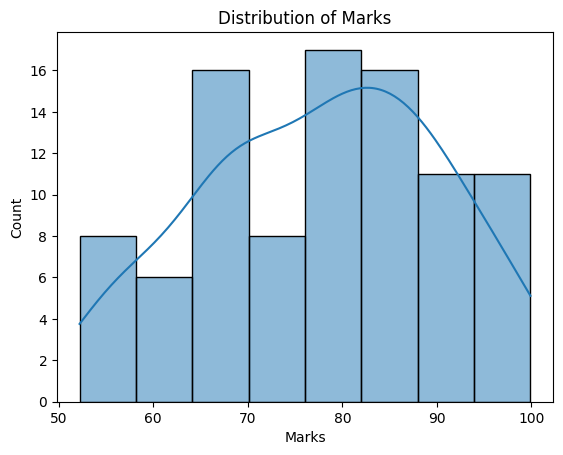

In [13]:
# Plotting distribution of marks
sns.histplot(students_df["Marks"], kde=True)
plt.title("Distribution of Marks")
plt.show()

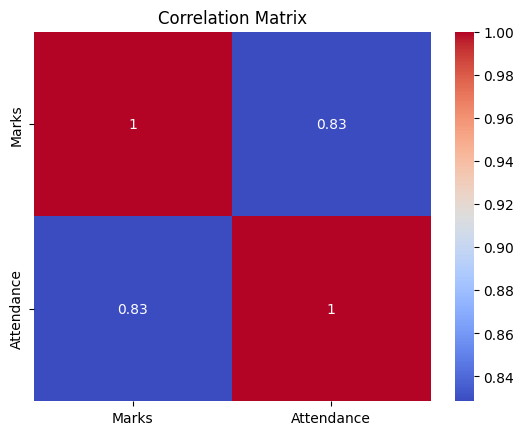

In [14]:
# Correlation heatmap between Marks and Attendance
correlation_matrix = students_df[["Marks", "Attendance"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

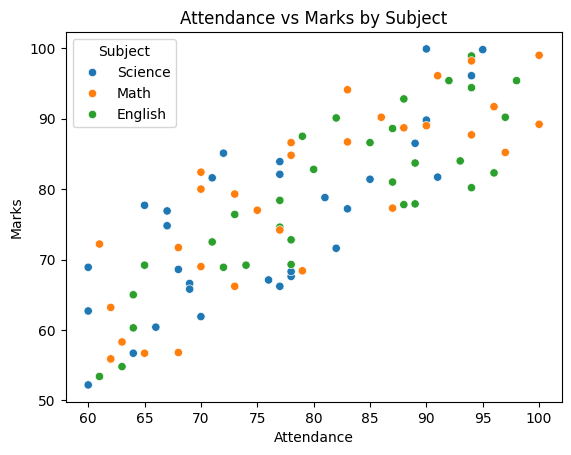

In [15]:
# Scatter plot between Attendance and Marks
sns.scatterplot(x="Attendance", y="Marks", hue="Subject", data=students_df)
plt.title("Attendance vs Marks by Subject")
plt.show()

# Subject-wise Analysis

In [16]:
# Grouping data by Subject and calculating average marks, attendance
subject_analysis = students_df.groupby("Subject").agg(
    Average_Marks=("Marks", "mean"),
    Average_Attendance=("Attendance", "mean"),
    Student_Count=("Subject", "count")
)
print("\n--- Subject-wise Analysis ---")
print(subject_analysis)



--- Subject-wise Analysis ---
        Average_Marks  Average_Attendance  Student_Count
Subject                                                 
English     79.174194           81.580645             31
Math        78.778125           79.156250             32
Science     75.263333           75.700000             30


# High Performers

In [17]:
# Filter and display high-performing students (Marks > 90)
high_performers = students_df[students_df["Marks"] > 90]
print("\n--- High Performers ---")
print(high_performers[["Name", "Subject", "Marks"]])


--- High Performers ---
         Name  Subject Marks
5      Ishaan     Math  91.7
8       Rohan     Math  99.0
9       Sneha  Science  99.9
14       Yash  Science  96.1
29      Leena  English  95.4
37     Deepak  English  98.9
48     Dinesh     Math  98.2
58       Yash  Science  99.8
75        Rao     Math  96.1
78     Kartik  English  95.4
84     Gopesh  English  90.1
85   Student1  English  94.4
91   Student7     Math  90.2
92   Student8     Math  94.1
93   Student9  English  92.8
96  Student12  English  90.2


# Grade Assignment


--- Grade Distribution ---
Grade
B    39
C    38
A    16
Name: count, dtype: int64


<ipython-input-18-21850735d757>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data=students_df, palette="coolwarm")


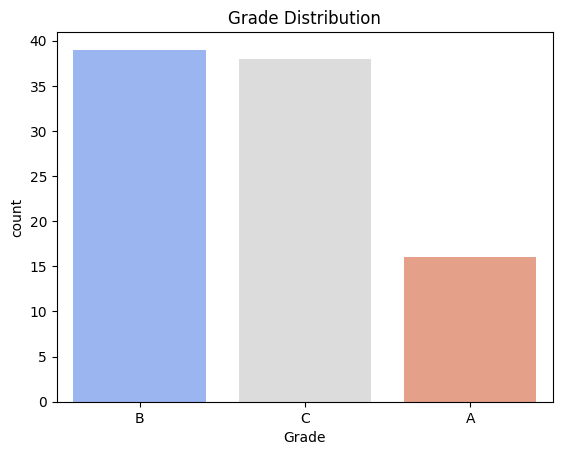

In [18]:
# Function to assign grade based on marks
def assign_grade(marks):
    if marks >= 90:
        return "A"
    elif marks >= 75:
        return "B"
    elif marks >= 50:
        return "C"
    else:
        return "D"

# Applying the grade assignment function to the 'Marks' column
students_df["Grade"] = students_df["Marks"].apply(assign_grade)

# Displaying grade distribution
print("\n--- Grade Distribution ---")
print(students_df["Grade"].value_counts())
sns.countplot(x="Grade", data=students_df, palette="coolwarm")
plt.title("Grade Distribution")
plt.show()

# Performance Score Calculation


--- Sample Performance Scores ---
     Name Marks  Attendance Performance_Score
1  Vivaan  81.7          91             84.49
2  Aditya  71.7          68             70.59
3  Ananya  72.2          61             68.84
4    Diya  66.6          69             67.32
5  Ishaan  91.7          96             92.99


<ipython-input-19-bba50784458d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subject", y="Performance_Score", data=students_df, palette="viridis")


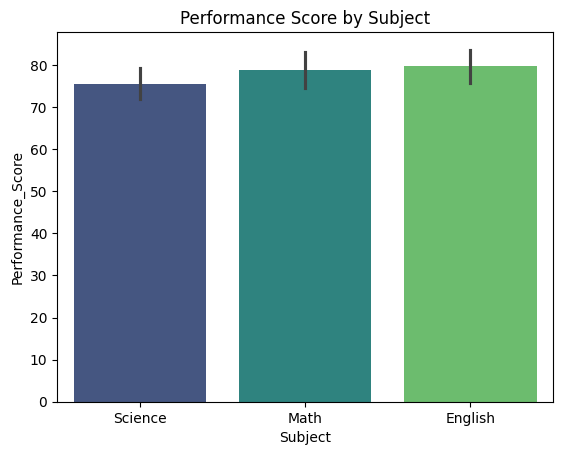

In [19]:
# Calculate performance score based on Marks and Attendance
students_df["Performance_Score"] = (
    students_df["Marks"] * 0.7 + students_df["Attendance"] * 0.3
)

# Display sample performance scores
print("\n--- Sample Performance Scores ---")
print(students_df[["Name", "Marks", "Attendance", "Performance_Score"]].head())

# Visualizing performance score by subject
sns.barplot(x="Subject", y="Performance_Score", data=students_df, palette="viridis")
plt.title("Performance Score by Subject")
plt.show()

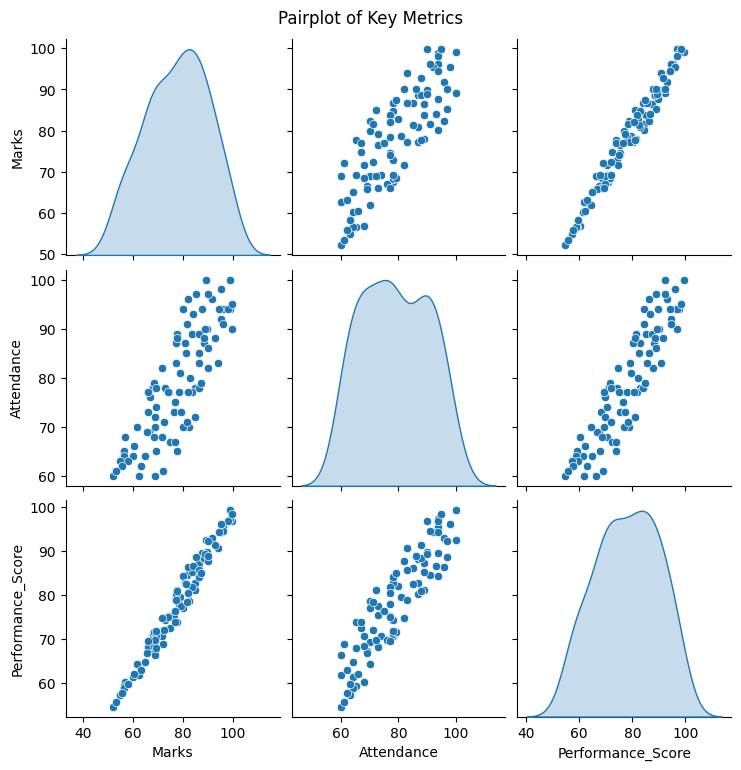

In [20]:
# Pairplot to visualize relationships between Marks, Attendance, and Performance Score
sns.pairplot(
    students_df[["Marks", "Attendance", "Performance_Score"]],
    diag_kind="kde",
)
plt.suptitle("Pairplot of Key Metrics", y=1.02)
plt.show()

This project aimed to demonstrate basic Python skills, including data manipulation, cleaning, and visualization, using libraries like NumPy, pandas, and Seaborn. We generated a dataset containing student attributes such as Student ID, Name, Subject, Attendance, and Marks, and performed data preprocessing tasks such as handling missing values and extending the dataset. Exploratory data analysis (EDA) helped us understand patterns in student performance, with visualizations like histograms, boxplots, and scatter plots uncovering trends and correlations between marks and attendance.

By applying basic Python techniques, such as list operations, dictionary handling, and array manipulation, this project showcases how to process and analyze data effectively. We also created performance scores based on attendance and marks and assigned grades to students. The project highlights the importance of data visualization and statistical analysis in extracting valuable insights from real-world data and lays the groundwork for more advanced data science projects, such as predictive modeling and automated grading systems.